In [2]:
import qiskit as q
from qiskit.tools.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram
from matplotlib import style
from math import pi
import numpy as np
from matplotlib import pyplot as plt

In [509]:

qc = q.QuantumCircuit(2,2)

qc.h(0)

qc.cx(0,1)

qc.h(0)


#qc.rz(pi/2,1)
#qc.s(1)
#qc.h(1)
#qc.rz(-pi/4,1)
#qc.tdg(1)
#qc.h(1)

qc.measure([0,1],[0,1])
qc.h(0)





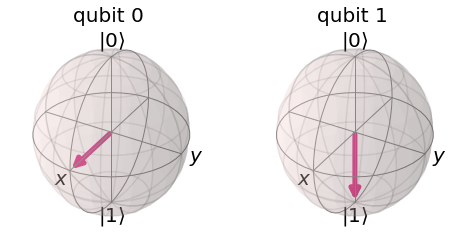

In [500]:
backend = q.Aer.get_backend('statevector_simulator') 
out_state = q.execute(qc,backend).result().get_statevector() 
plot_bloch_multivector(out_state)

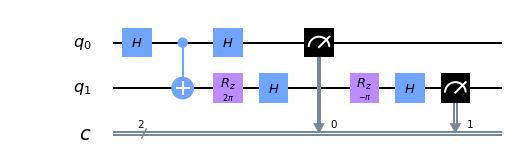

In [506]:
qc.draw('mpl')

In [475]:
sim_backend = q.Aer.get_backend('qasm_simulator')
counts = q.execute(qc,sim_backend,shots=8192).result().get_counts()

print(counts)

{'00': 4031, '01': 4161}


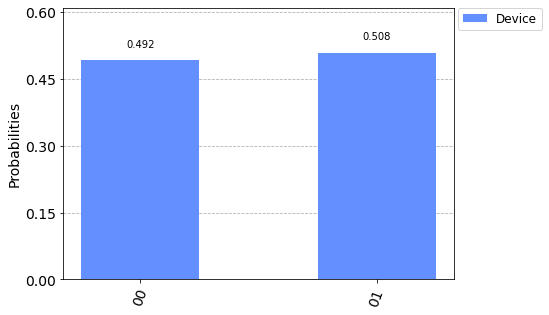

In [494]:
plot_histogram([counts], legend=['Device'])

In [507]:
AB=(counts['11']+counts['00']-counts['01']-counts['10'])\
/(counts['11']+counts['00']+counts['01']+counts['10'])


print(AB)

-0.0009765625


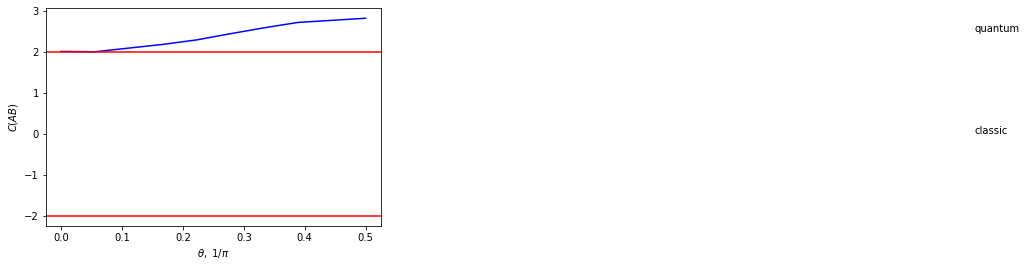

In [5]:
correlation=[]
theta_arr=np.linspace(0,pi/2,10)
for theta in theta_arr:
    AB={}
  # list_of_circuits=[up_up,down_down,down_up,up_down]
    names=['up_up','down_down','down_up','up_down']
    for i in range(4):
        qc = q.QuantumCircuit(2,2)
        qc.h(0)
        qc.cx(0,1)
        if i==2 or i==3:
            qc.h(0)
        else : 
             pass
        qc.rz(theta,1)
        qc.h(1)
        if i==0 or i==2:
            qc.rz(theta/2,1)
        else:
            qc.rz(-theta/2,1)
        qc.h(1)
        qc.measure([0,1],[0,1])
        sim_backend = q.Aer.get_backend('qasm_simulator')
        counts = q.execute(qc,sim_backend,shots=8192).result().get_counts()
        #print(counts)
        try:
            ab=(counts['11']+counts['00']-counts['01']-counts['10'])\
            /(counts['11']+counts['00']+counts['01']+counts['10'])
        except:
            try:
                ab=(counts['11']+counts['00'])\
                /(counts['11']+counts['00'])
            except:
                 ab=(-counts['01']-counts['10'])\
                /(counts['01']+counts['10'])
        AB[names[i]]=ab
    correlation.append(AB['up_up']-AB['up_down']+AB['down_down']+AB['down_up'])
    

plt.plot(theta_arr/pi,correlation,color='b')
plt.ylabel('$C(AB)$')
plt.xlabel(r'$\theta,\ 1/\pi$')
plt.axhline(2,color='red')
plt.axhline(-2,color='red')
plt.text(1.5,0,'classic')
plt.text(1.5,2.5,'quantum')
plt.show()
    